In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import pandas as pd
import PIL
import time
import os
from helper import get_car_paths, get_cars_df
import random
from sklearn.model_selection import train_test_split

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms
from torch import nn
import torch.optim as optim

from fastai import *
from fastai.vision import *

In [3]:
def seed_all(seed=42):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)

seed_all(seed=42)

# Download and Untar Data

In [4]:
train_path, test_path = get_car_paths()
train_df = get_cars_df('cars_train_annos.mat')
test_df = get_cars_df('cars_test_annos_withlabels.mat')

In [5]:
tfms = get_transforms()
sz = (300, 300)    #Squish Resize if a tuple is defined
bs = 32
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.2, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

# Resnet50 40 Epochs

In [6]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [7]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


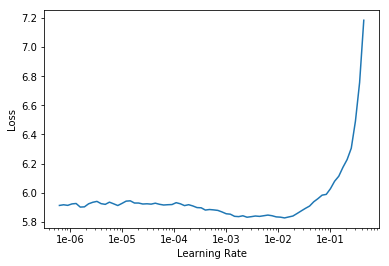

In [8]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,5.374745,4.702300,0.059582,01:05
1,4.405979,3.723193,0.242629,00:59
2,3.439816,2.826217,0.390663,00:59
3,2.715753,2.384687,0.452703,00:59
4,2.155941,2.064987,0.531941,00:59
5,1.958253,2.358379,0.433047,01:00
6,1.818895,2.223970,0.418919,01:00
7,1.661903,1.732421,0.539312,01:00
8,1.490926,2.274279,0.438575,00:59
9,1.383215,1.442426,0.627150,00:59


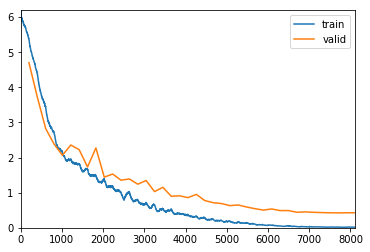

In [8]:
lr = 1e-3
wd = 1e-1
learn.fit_one_cycle(40, max_lr=lr, wd=wd)
# learn.fit_one_cycle(20, slice(lr/10, lr))

In [9]:
learn.save('res50_40epochs')

# Resnet50 20 Epochs bs 64

In [6]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [7]:
tfms = get_transforms()
sz = (300, 300)    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.2, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [8]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


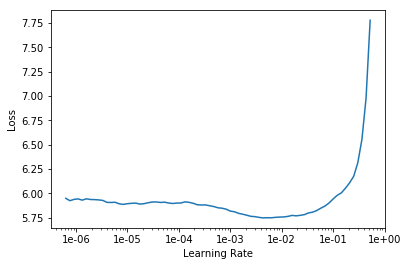

In [9]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,5.266619,4.478752,0.093366,00:56
1,4.009206,3.396544,0.254914,00:54
2,3.053596,3.190016,0.246314,00:55
3,2.614724,3.919404,0.149263,00:54
4,2.419623,3.134071,0.231572,00:54
5,2.029357,3.861951,0.181204,00:54
6,1.711986,2.216925,0.409091,00:54
7,1.446769,1.844522,0.518427,00:54
8,1.205150,1.796127,0.529484,00:54
9,1.042216,1.575210,0.555897,00:54


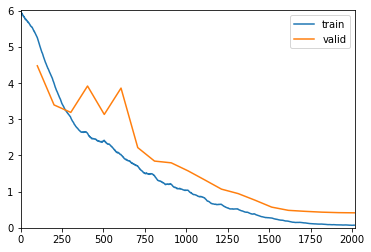

In [10]:
lr = 2e-3
wd = 1e-1
learn.fit_one_cycle(20, max_lr=lr, wd=wd)
# learn.fit_one_cycle(20, slice(lr/10, lr))

In [9]:
learn.save('res50_20epochs_64bs')

# Resnet50 20 Epochs bs 64 wd 1e-5

In [16]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [17]:
tfms = get_transforms()
sz = (300, 300)    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.2, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [18]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,5.160089,4.398180,0.092752,00:54
1,3.938014,3.369240,0.258600,00:55
2,2.948314,3.179510,0.273342,00:55
3,2.596850,4.852266,0.095209,00:54
4,2.393351,4.262276,0.152334,00:54
5,2.069522,3.139378,0.281327,00:54
6,1.691511,2.730028,0.348894,00:55
7,1.405698,1.697314,0.547297,00:55
8,1.199085,1.527501,0.580467,00:54
9,1.015354,1.396158,0.613022,00:55


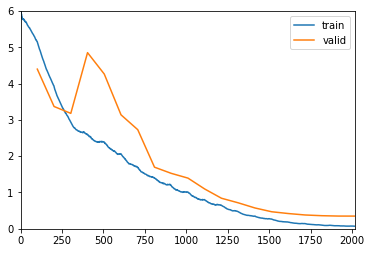

In [19]:
lr = 2e-3
wd = 1e-5
learn.fit_one_cycle(20, max_lr=lr, wd=wd)
# learn.fit_one_cycle(20, slice(lr/10, lr))

In [20]:
learn.save('res50_20epochs_64bs_wd1e-5')

# Resnet50 20 Epochs bs 64, size=224x224

In [12]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

this Learner object self-destroyed - it still exists, but no longer usable


In [13]:
tfms = get_transforms()
sz = (224, 224)    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.2, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [14]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,5.262793,4.434870,0.100123,00:43
1,4.095778,3.516619,0.218059,00:40
2,3.247416,3.333811,0.221130,00:40
3,2.944893,3.768213,0.165233,00:40
4,2.687114,3.883756,0.157248,00:41
5,2.461197,3.084675,0.271499,00:40
6,2.051124,2.820350,0.312039,00:40
7,1.776286,2.928091,0.292383,00:41
8,1.506207,2.151350,0.445946,00:41
9,1.236154,2.012717,0.457617,00:41


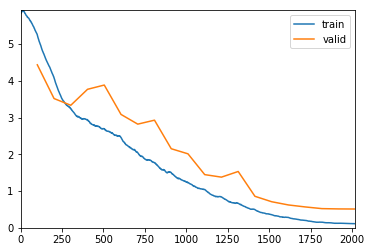

In [15]:
lr = 2e-3
wd = 1e-1
learn.fit_one_cycle(20, max_lr=lr, wd=wd)
# learn.fit_one_cycle(20, slice(lr/10, lr))

In [11]:
learn.save('res50_20epochs_64bs_sz224x224')

# Resnet50 20 Epochs bs 64, size=224, max_zoom=1.05, wd=1e-3, lr=slice(lr/10, lr)

In [6]:
try:
    learn.destroy()
    del learn
    gc.collect()
except Exception as e:
    print(e)

name 'learn' is not defined


In [7]:
tfms = get_transforms(max_rotate=20.0, max_zoom=1.05)
sz = 224    #Squish Resize if a tuple is defined
bs = 64
img_data = ImageDataBunch.from_df(train_path, train_df,
                                  ds_tfms=tfms, size=sz, fn_col=0, label_col=1, valid_pct=0.2, bs=bs)
img_data_test = ImageDataBunch.from_df(test_path, test_df,
                                  ds_tfms=None, size=sz, fn_col=0, label_col=1, valid_pct=0., bs=bs)

In [8]:
learn = cnn_learner(img_data, models.resnet50, metrics=[accuracy], loss_func=nn.CrossEntropyLoss(), path='.', callback_fns=ShowGraph)
learn = learn.to_fp16()
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,5.630437,5.063973,0.028870,00:45
1,5.055996,4.442995,0.116708,00:45
2,4.305752,3.696890,0.213759,00:45
3,3.497288,2.916589,0.367322,00:45
4,2.653569,2.199481,0.506142,00:45
5,1.953425,1.594127,0.610565,00:44
6,1.417806,1.291124,0.657248,00:45
7,1.106169,1.207094,0.670762,00:44
8,0.950242,1.256185,0.670147,00:44
9,0.829560,1.222301,0.652334,00:44


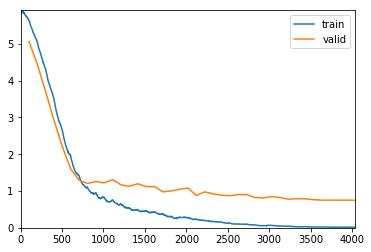

In [9]:
lr = 2e-3
wd = 1e-3
learn.fit_one_cycle(40, max_lr=slice(lr/100, lr), wd=wd)
# learn.fit_one_cycle(20, slice(lr/10, lr))

In [10]:
learn.save('res50_20epochs_64bs_sz224_wd1e-3_lrslice')